# Pymaceuticals Inc.
---

### Analysis

- Write at least three observations or inferences that can be made from the data.
1) Capomulin has a slightly larger/higher mean, median, mode, variance, standard deviation and sem than the competitng drug Ramicane.          These results make Capomulin the drug with the best results after Ramicane.
2) The line graph shows the Capomulin treatment of mouse l509 drastically decreases the size of the tumor after 20 days. Between days          20 and 40 of treatment, the tumor size goes from a high of 48 mm3 on day 20 to a low point of slightly above 40 mm3 at day 35. This          is followed by a slight increase in size to 41 mm3 at day 40. 
3) The correlation of 0.83 is a strong positive one between average tumor volume and weight. As a mouse weight increases, so does the          size of the tumor. 
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import plotly.express as px
import scipy.stats as stats
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice.
mice_number = len(study_complete["Mouse ID"].unique())
mice_number

249

In [31]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = study_complete.duplicated(subset=['Mouse ID', 'Timepoint'])

duplicate_mice_ID = study_complete.loc[duplicate_mice,"Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mice_all_data = study_complete[study_complete["Mouse ID"] == "g989"]
duplicate_mice_all_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicate_mice = study_complete.drop(study_complete[study_complete["Mouse ID"] == "g989"].index)
no_duplicate_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
# Checking the number of mice in the clean DataFrame.
mice_number_unique = len(no_duplicate_mice["Mouse ID"].unique())
mice_number_unique

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

summary_stats = no_duplicate_mice.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_tumor_volume = summary_stats['Tumor Volume (mm3)'].mean()
median_tumor_volume = summary_stats['Tumor Volume (mm3)'].median()
variance_tumor_volume = summary_stats['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = summary_stats['Tumor Volume (mm3)'].std()
sem_tumor_volume = summary_stats['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = no_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

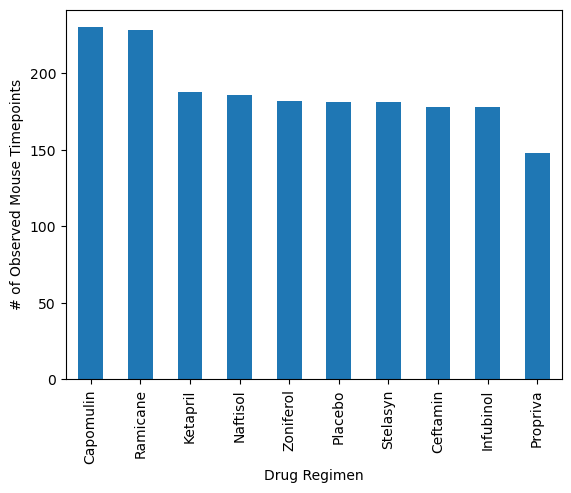

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_bar = no_duplicate_mice.groupby('Drug Regimen').count()['Mouse ID'].sort_values(ascending=False)
mouse_bar.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

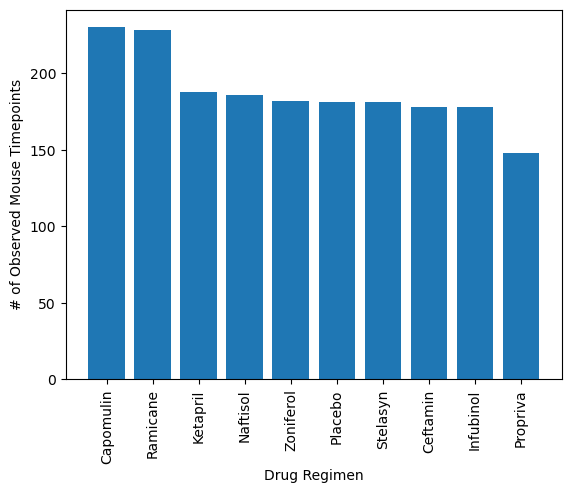

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(mouse_bar.index, mouse_bar.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

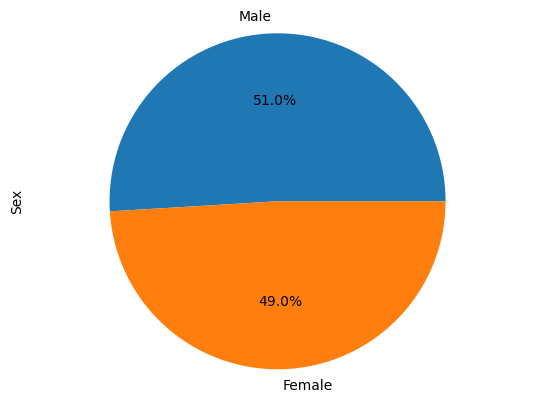

In [39]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study


# Get the unique mice with their gender
male_female_count = no_duplicate_mice['Sex'].value_counts()

# Make the pie chart
male_female_count.plot(kind="pie", autopct='%1.1f%%')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

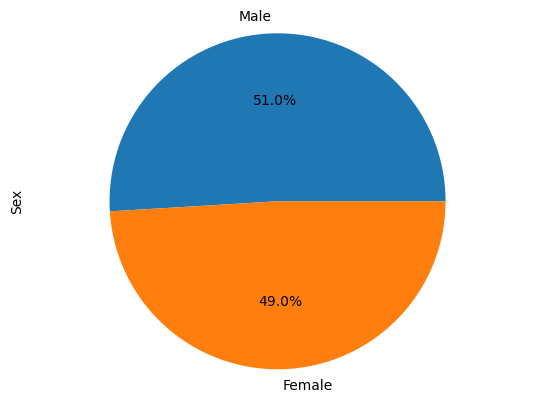

In [40]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sizes = male_female_count.values
labels = male_female_count.index

# Make the pie chart using Matplotlib's pyplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Group by 'Mouse ID' and find the maximum timepoint for each mouse
max_timepoint = no_duplicate_mice.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge with the original DataFrame to get the final tumor volume for each mouse
merged_data = pd.merge(no_duplicate_mice, max_timepoint, on=['Mouse ID', 'Timepoint'])

# Filter the data for the specified treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [42]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and determine potential outliers for each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor volume data list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the potential outliers for each treatment regimen
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


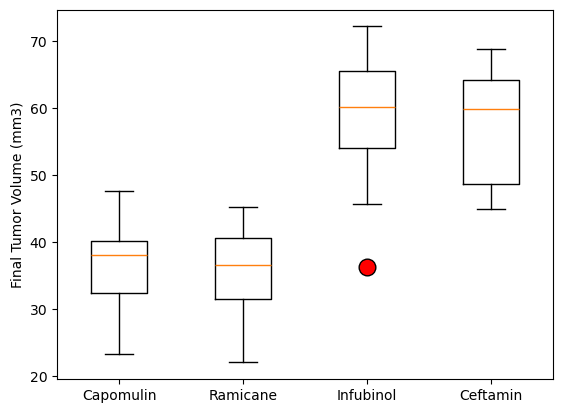

In [43]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='r', markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

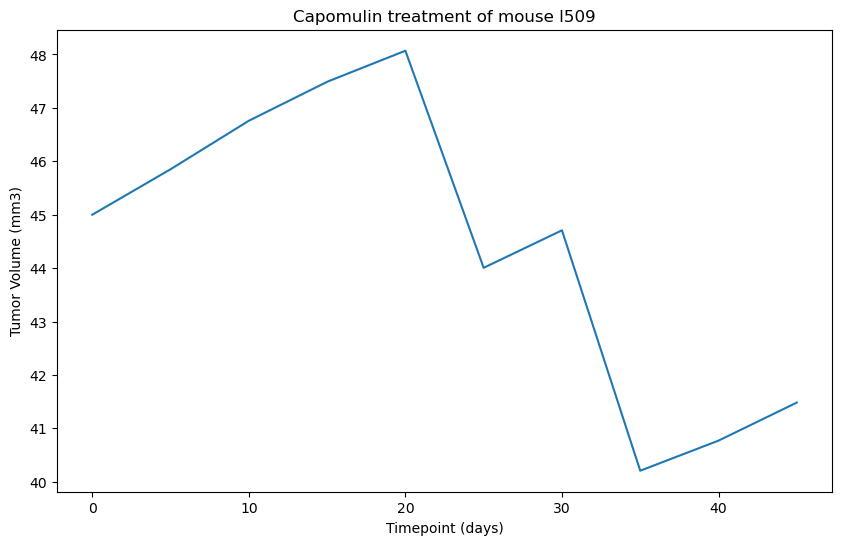

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the DataFrame for a single mouse treated with Capomulin
single_mouse_data = no_duplicate_mice[(no_duplicate_mice['Drug Regimen'] == 'Capomulin') & (no_duplicate_mice['Mouse ID'] == 'l509')]

#Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

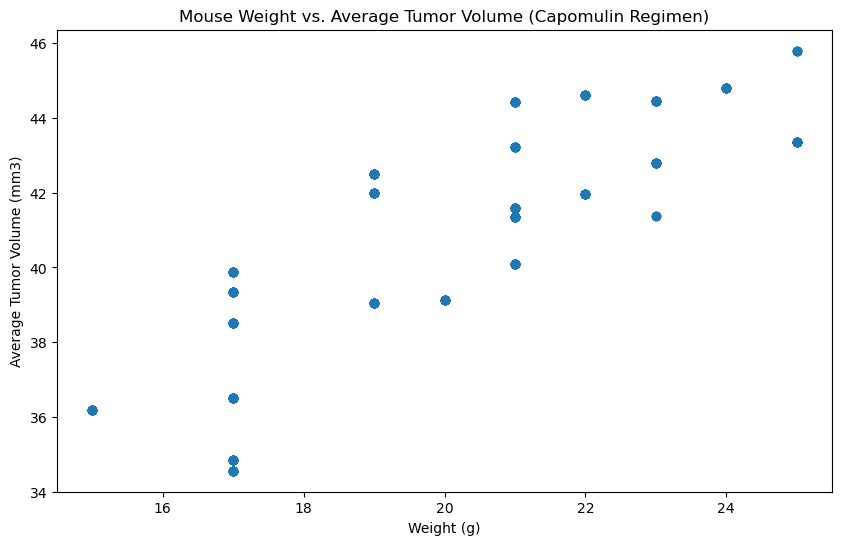

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group by 'Mouse ID' and calculate the average tumor volume for each mouse in the Capomulin regimen
avg_tumor_volume = no_duplicate_mice[no_duplicate_mice['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(avg_tumor_volume, no_duplicate_mice, on='Mouse ID')

# Create a scatter plot of mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_x'])
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


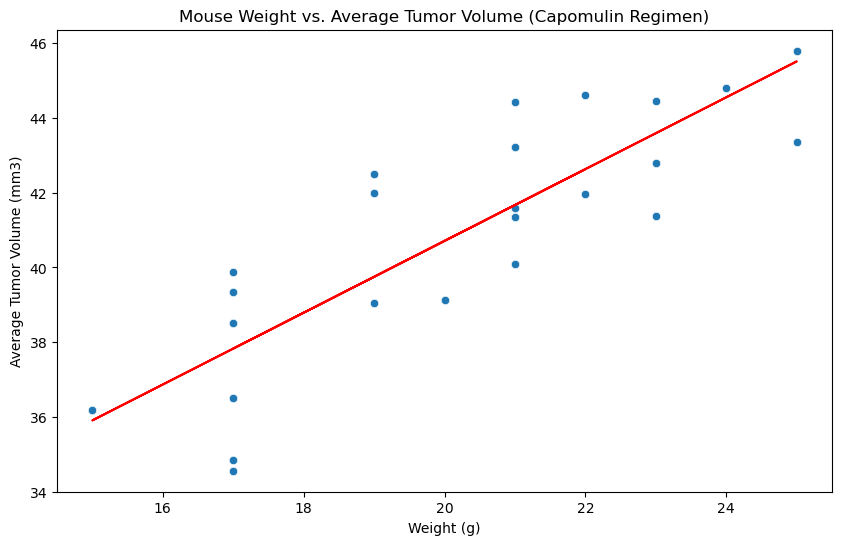

In [46]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = stats.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_x'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Perform linear regression to model the relationship
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_x'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight (g)', y='Tumor Volume (mm3)_x', data=merged_data)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)_x'])
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')

plt.show()